In [ ]:
# https://www.kaggle.com/radmirzosimov/13-and-rate-0-12259-with-xgbregressor
#  Follow and learn XBoost regressor model to have aroun 0.12 R2 score.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno


%matplotlib inline
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

In [2]:
#  Read data 
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')


In [3]:
print(train.shape, test.shape)

(1460, 81) (1459, 80)


In [3]:
train.head(3) # display the 3 first lines

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
# get info on the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

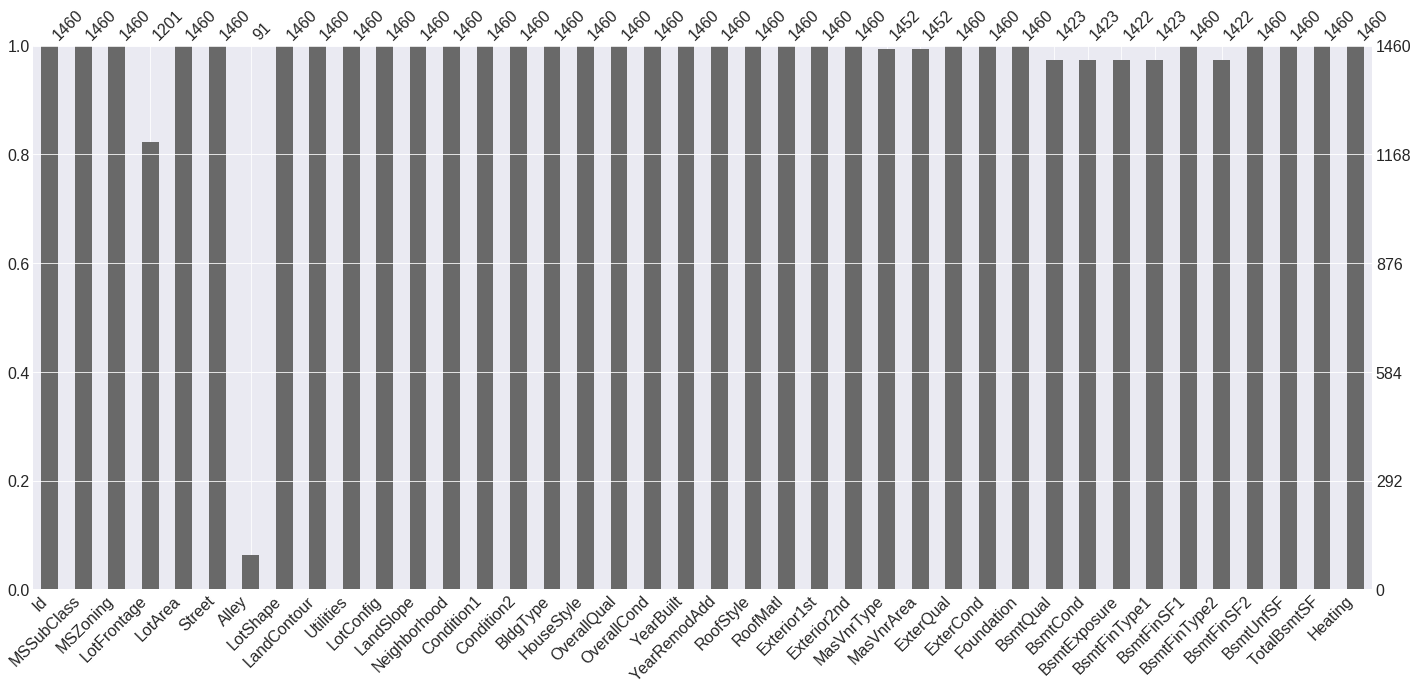

In [6]:
msno.bar(train.iloc[:, :40]) # bar plot

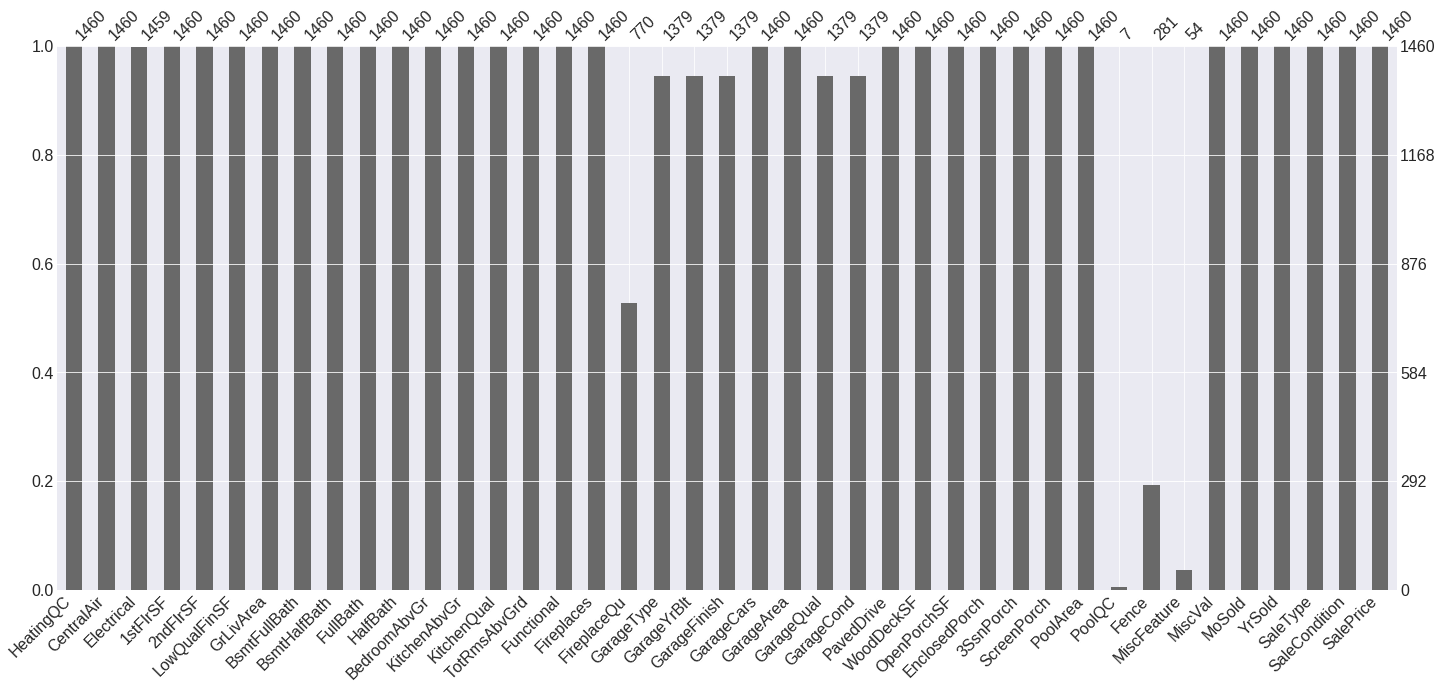

In [7]:
msno.bar(train.iloc[:, 40:])


In [8]:
train.iloc[:, :40].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000


In [9]:
train.iloc[:, 40:-1].describe()


,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [10]:
pd.DataFrame(train['SalePrice'].describe()) # describe the independant value y

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


#  EDA : Visualisation of some features

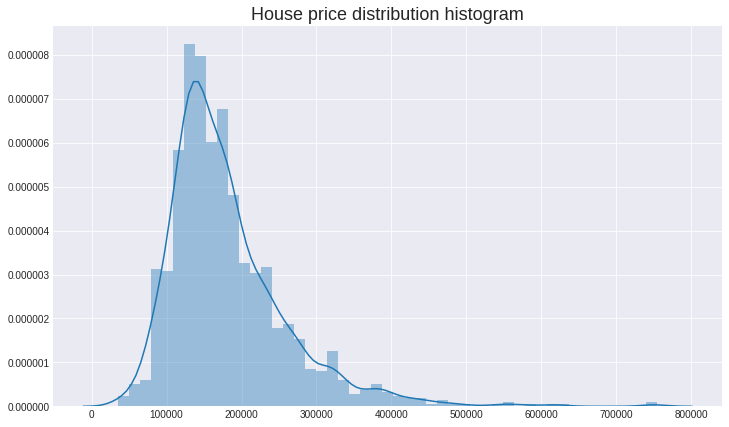

In [11]:
plt.figure(figsize=(12, 7))

sns.distplot(train['SalePrice']).set(ylabel=None, xlabel=None)
plt.title('House price distribution histogram', fontsize=18)
plt.show()
# see the house distribution

We have a possitive skewed data.. We must fix it

In [12]:
train['SalePrice'] = np.log1p(train['SalePrice'])


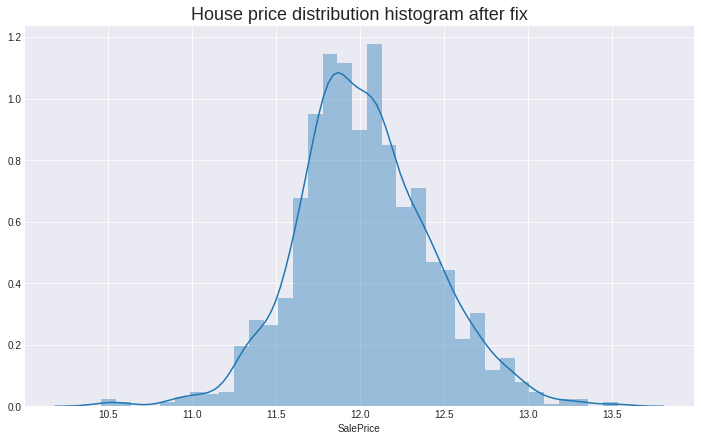

In [13]:

plt.figure(figsize=(12, 7))

sns.distplot(train['SalePrice'])
plt.title('House price distribution histogram after fix', fontsize=18)
plt.show()


Now it is better 

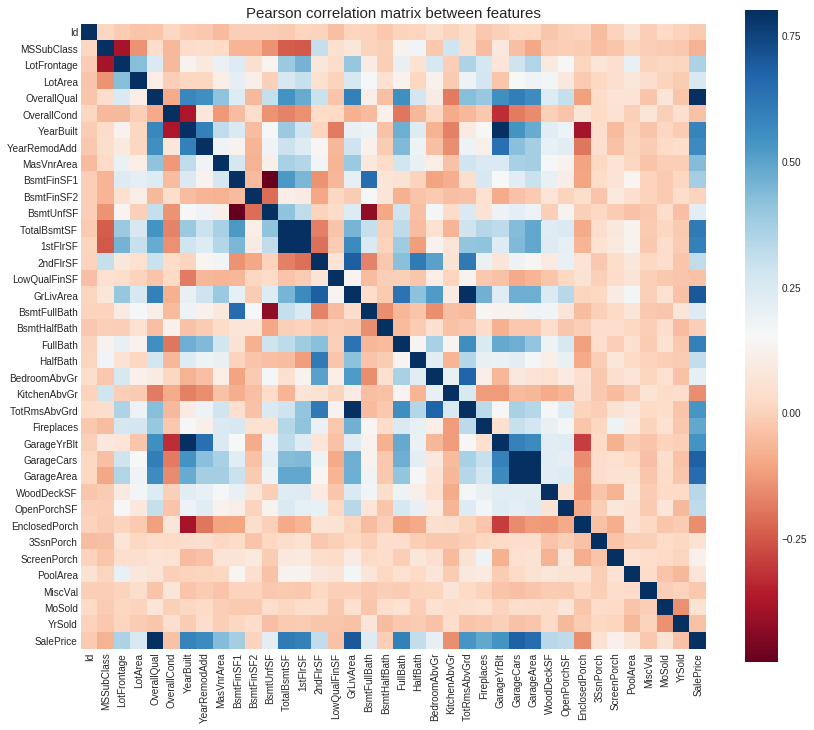

In [14]:
# pearson correlation function to see correlation between features

corr_train = train.corr()

colormap = plt.cm.RdBu

plt.figure(figsize=(14,12))
plt.title('Pearson correlation matrix between features', y=1, size=15)
sns.heatmap(corr_train, vmax=.8, square=True, cmap=colormap)
plt.show()



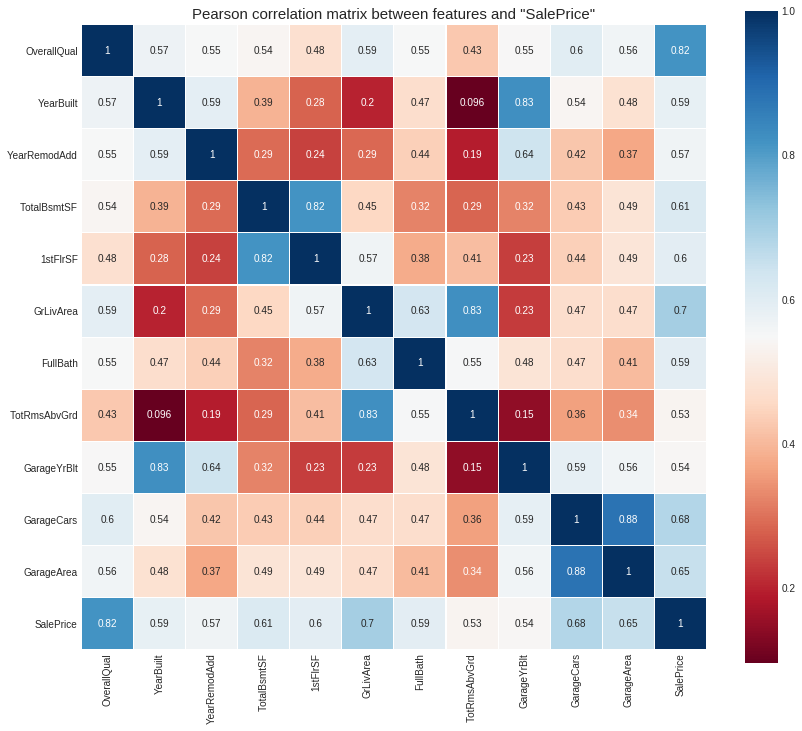

In [15]:
# look at correlation specificaly betwe price and features


highest_corr_features = corr_train.index[
    abs(corr_train['SalePrice']) > 0.5
    ]

plt.figure(figsize=(14,12))
plt.title('Pearson correlation matrix between features and "SalePrice"', y=1, size=15)
sns.heatmap(train[highest_corr_features].corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()



In [16]:
    #### Saleprice is highly correlated with OverallQual
    #### GarageArea logically has a great relationship with GarageCars
    #### Have the smallest connection YearBuilt and TotRmsAbvGrd
    #### Also highly correlated 1stFirSF and TotalBsmtSF
    #### TotRmsAbvGrd is highly correlated with GrLivArea



In [17]:
SalePrice = pd.DataFrame(corr_train['SalePrice'].sort_values(ascending=False))
SalePrice
# print out the correlation with saleprice to see higly correlated features with saleprice

,SalePrice
SalePrice,1.000000
OverallQual,0.817185
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134
1stFlrSF,0.596981
FullBath,0.594771
YearBuilt,0.586570
YearRemodAdd,0.565608


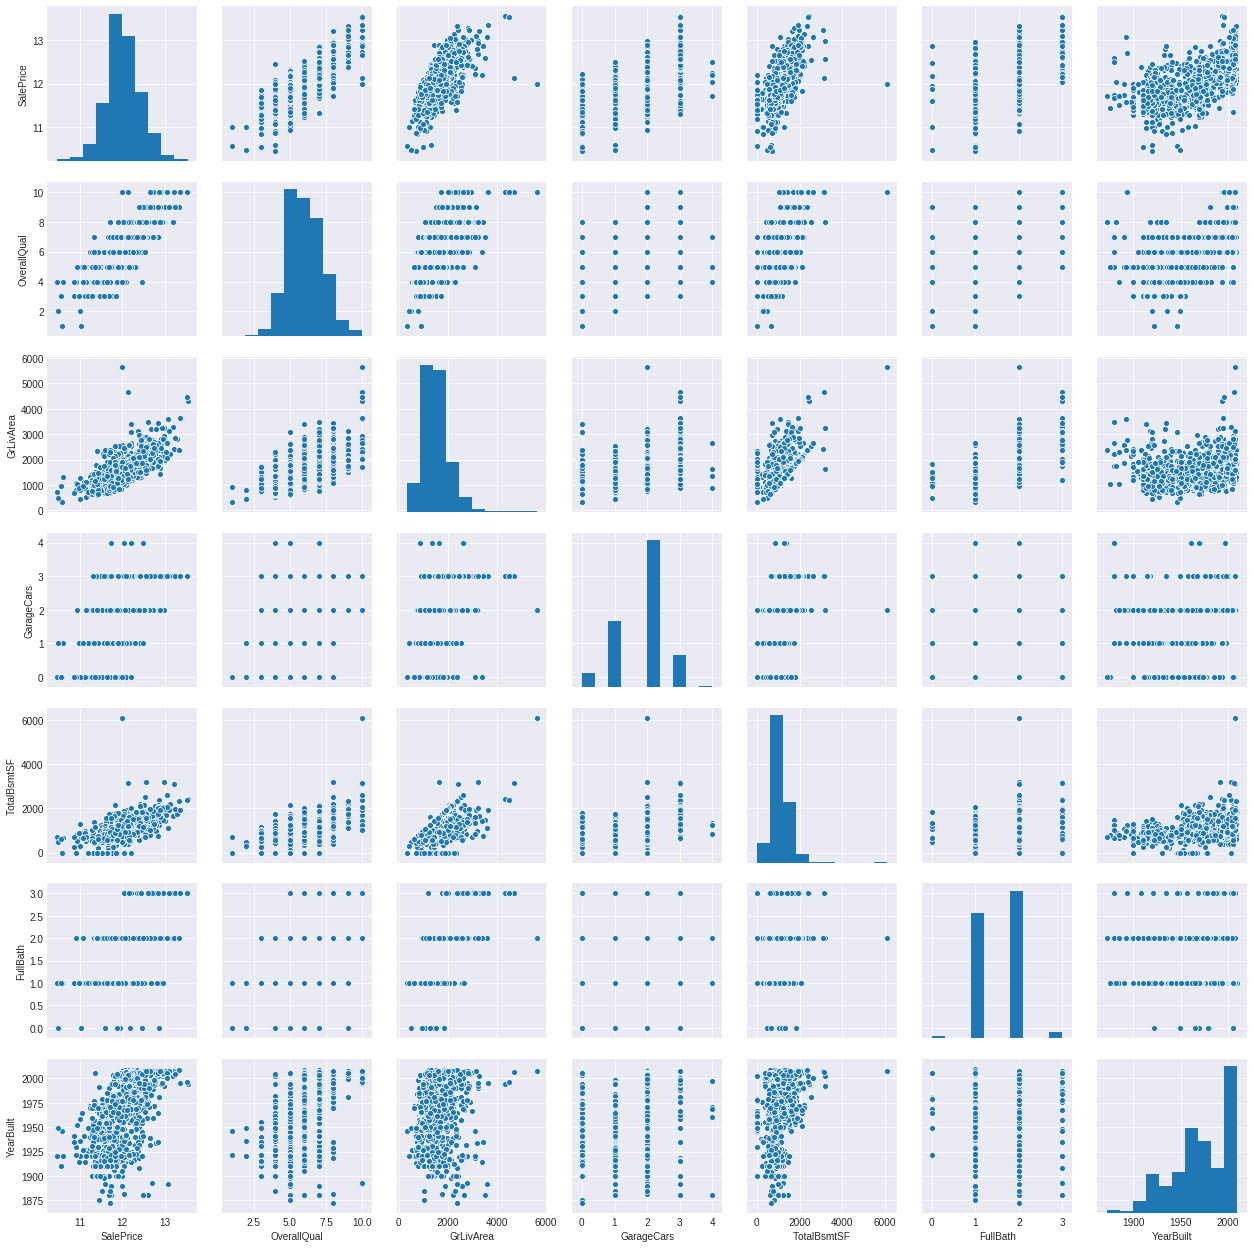

In [18]:
# use strongly related features (related to saleprice)
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sns.pairplot(train[features])
plt.show()
# show the pairplot 

In [19]:
# COMBINE THE DATA SET FOR CONVENIENCE
y_train = train['SalePrice']
test_id = test['Id']
data = pd.concat([train, test], axis=0, sort=False)
data = data.drop(['Id', 'SalePrice'], axis=1)


In [20]:
data.shape

(2919, 79)

In [21]:
# look at the nan values 
Total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)



,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [24]:
data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
print(data.isnull().sum().max())

In [25]:
# remove the not too important features and that have low correlation with saleprice
# numeric data. replace the missing values by 0
numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

for feature in numeric_missed:
    data[feature].fillna(0, inplace=True)

In [26]:
data.shape

(2919, 61)

In [27]:
# Deal with missing values in categorical data
# replace the missing values by the mode of the column repective
categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual']

for feature in categorical_missed:
    data[feature].fillna(data[feature].mode()[0], inplace=True)

In [28]:
data.shape

(2919, 61)

In [30]:
data['Functional'].fillna('Typ', inplace=True)

In [ ]:
# check again the missing values in the data
data.isnull().sum().max() 


## FeatureEngineering

In [31]:
# Fix the skewness in the other features
from scipy.stats import skew

numeric = data.dtypes[data.dtypes != 'object'].index
skewed = data[numeric].apply(lambda col: skew(col)).sort_values(ascending=False)
skewed = skewed[abs(skewed) > 0.5]

for feature in skewed.index:
    data[feature] = np.log1p(data[feature])

In [32]:
# generate dummie variables (convert categorical values to numerical)
data = pd.get_dummies(data)
data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,1.791759,7.602900,2003,6.561031,0.0,5.017280,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,6,2.197225,7.589336,1976,6.886532,0.0,5.652489,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,7,1.791759,7.601902,2002,6.188264,0.0,6.075346,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,7,1.791759,7.557995,1970,5.379897,0.0,6.293419,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,8,1.791759,7.601402,2000,6.486161,0.0,6.196444,7.044033,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,7.568896,4,2.079442,7.586296,1970,0.000000,0.0,6.304449,6.304449,...,0,0,0,1,0,0,0,0,1,0
1455,5.081404,7.546974,4,1.791759,7.586296,1970,5.533389,0.0,5.686975,6.304449,...,0,0,0,1,1,0,0,0,0,0
1456,3.044522,9.903538,5,2.079442,7.581210,1996,7.110696,0.0,0.000000,7.110696,...,0,0,0,1,1,0,0,0,0,0
1457,4.454347,9.253591,5,1.791759,7.597396,1992,5.823046,0.0,6.356108,6.816736,...,0,0,0,1,0,0,0,0,1,0


In [33]:
data.shape

(2919, 220)

In [34]:
# Slit into train and test data set 
x_train = data[:len(y_train)]
x_test = data[len(y_train):]


In [35]:
print(x_train.shape, x_test.shape)

(1460, 220) (1459, 220)


In [38]:
# save the cleaned data for potential use later 
from sklearn.externals import joblib

joblib.dump(x_train, "x_train_cleaned2.pkl")
joblib.dump(x_test, "x_test_cleaned2.pkl")

['x_test_cleaned2.pkl']

## Build teh model 

In [39]:
# load the data back
x_train = joblib.load("x_train_cleaned2.pkl")
x_test = joblib.load("x_test_cleaned2.pkl")

print(x_test.shape, x_train.shape)

(1459, 220) (1460, 220)


In [42]:
# Import usefull libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold,  cross_val_score
from sklearn.metrics import mean_squared_error


In [46]:
# Run Xboost regression model
import xgboost as XGB

xgb_model = XGB.XGBRegressor(colsample_bytree = 0.4603, 
                           gamma = 0.0468, 
                           learning_rate = 0.05, 
                           max_depth = 3,
                            min_child_weight=1.7817,
                            n_estimators=2200,
                             reg_alpha=0.4640, 
                            reg_lambda=0.8571,
                             subsample=0.5213, 
                            random_state =7, 
                            nthread = -1
                           )

xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=4, nthread=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=7, reg_alpha=0.464,
             reg_lambda=0.8571, scale_pos_weight=1, subsample=0.5213,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
!pip install xgboost

     |████████████████████████████████| 157.5 MB 3.2 MB/s eta 0:00:01     |█████████████████████████▍      | 125.1 MB 3.3 MB/s eta 0:00:10


In [47]:
y_predict = np.floor(np.expm1(xgb_model.predict(x_test)))

sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = y_predict
sub.to_csv('submission2_xgboost.csv',index=False)

In [ ]:
# et cets fini.. very brillant ce gar.